# Stage 7

This notebook summarises the major findings from the ML results. Links to detailed visualisation notebooks will be added throughout the notebook. However, only the graphs that best deprict the main findings are shown in this notebook.

The notebook is split by the major findings. These are:
1. [Backends can be distinguished with 98-100% accuracy using SVM and KNN](#1-backends-can-be-distinguished-with-98-100-accuracy-using-svm-and-knn)

2. [Simulated Data cannot replace hardware data](#2-simulated-data-cannot-replace-hardware-data)


3. [Circuit Effect](#3-circuit-effect)

4. [Backend vs Backend](#4-Backend-vs-Backend)
------------------------------------------------------------------------------------
Observations without graphs but with links to graphs:


5. [The best param modes for SVM and KNN](#5-the-best-param-modes-for-svm-and-knn-)



--------------------------------------------------------------------------------
For future:
1. Does time affect hardware noise fingerprint?
2. Does sparsity reduction improve ML results (particularly related to simulations)


## Imports


In [1]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from investigation_functions import ml_visualisation_funcs as mvf

## 1. Backends can be distinguished with 98-100% accuracy using SVM and KNN

### Loading Data

In [2]:
df_svm_4q_HSR = pd.read_csv('../../ML_results/SVM/svm_4q.csv')
df_svm_8q_HSR = pd.read_csv('../../ML_results/SVM/svm_8q.csv')
df_svm_16q_c111 = pd.read_csv('../../ML_results/SVM/svm_16q_HSR_c111.csv')

In [3]:
df_knn_4q_HSR = pd.read_csv('../../ML_results/KNN/knn_4q_bvb2.csv')
df_knn_8q_HSR = pd.read_csv('../../ML_results/KNN/knn_8q_bvb2.csv')
df_knn_16q_c111 = pd.read_csv('../../ML_results/KNN/knn_16q_HSR_c111.csv')

### Sorting Data


In [4]:
df_svm_4q_HSR = df_svm_4q_HSR[df_svm_4q_HSR['machines'] == 1111]
df_svm_8q_HSR = df_svm_8q_HSR[df_svm_8q_HSR['machines'] == 1111]

df_knn_4q_HSR = df_knn_4q_HSR[df_knn_4q_HSR['machines'] == 1111]
df_knn_8q_HSR = df_knn_8q_HSR[df_knn_8q_HSR['machines'] == 1111]

df_svm_4q_hsr_c111 = df_svm_4q_HSR[df_svm_4q_HSR['tr&v circuits'] == 111]
df_svm_8q_hsr_c111 = df_svm_8q_HSR[df_svm_8q_HSR['tr&v circuits'] == 111]

df_knn_4q_hsr_c111 = df_knn_4q_HSR[df_knn_4q_HSR['tr&v circuits'] == 111]
df_knn_8q_hsr_c111 = df_knn_8q_HSR[df_knn_8q_HSR['tr&v circuits'] == 111]

df_4q_HSR = pd.concat([df_svm_4q_hsr_c111.drop('kernal', axis=1),df_knn_4q_hsr_c111.drop('n_neighbors', axis=1)],ignore_index=True)
df_8q_HSR = pd.concat([df_svm_8q_hsr_c111.drop('kernal', axis = 1),df_knn_8q_hsr_c111.drop('n_neighbors',axis =1)],ignore_index=True)
df_16q_HSR = pd.concat([df_svm_16q_c111.drop('kernal', axis=1),df_knn_16q_c111.drop('n_neighbors', axis=1)],ignore_index=True)

df_4q_HSR = df_4q_HSR[df_4q_HSR['tr&v exp_type'] == df_4q_HSR['test exp_type']]
df_8q_HSR = df_8q_HSR[df_8q_HSR['tr&v exp_type'] == df_8q_HSR['test exp_type']]
df_16q_HSR = df_16q_HSR[df_16q_HSR['tr&v exp_type'] == df_16q_HSR['test exp_type']]

df_full = pd.concat([df_4q_HSR,df_8q_HSR,df_16q_HSR],ignore_index=True)
df_full['accuracy'] = df_full['accuracy']*100

### Plotting Data


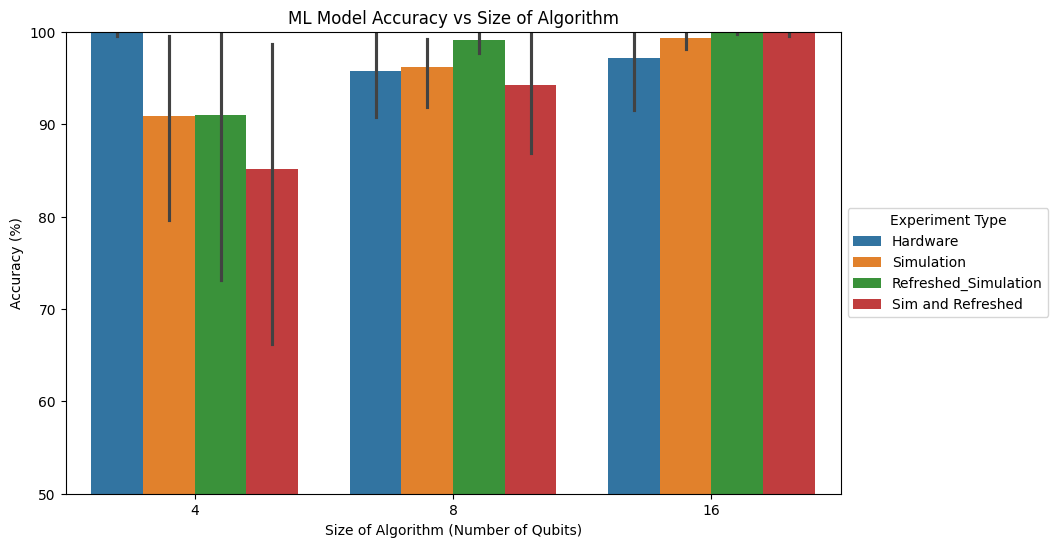

In [5]:
plt.figure(figsize=(10,6))
sns.barplot(
    data = df_full,
    x = 'nr_qubits',
    y = 'accuracy',
    hue= 'tr&v exp_type'    
)
plt.ylim(tuple([50,100]))
plt.title('ML Model Accuracy vs Size of Algorithm')
plt.xlabel('Size of Algorithm (Number of Qubits)')
plt.ylabel('Accuracy (%)')
plt.legend(title='Experiment Type',loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Loading Data


In [6]:
df_svm_4q_BVB = pd.read_csv('../../ML_results/SVM/svm_4q_bvb2.csv')
df_svm_8q_BVB = pd.read_csv('../../ML_results/SVM/svm_8q_bvb2.csv')
df_svm_16q_BVB = pd.read_csv('../../ML_results/SVM/svm_16q_bvb2.csv')

In [7]:
df_knn_4q_BVB = pd.read_csv('../../ML_results/KNN/knn_4q_bvb2.csv')
df_knn_8q_BVB = pd.read_csv('../../ML_results/KNN/knn_8q_bvb2.csv')
df_knn_16q_BVB = pd.read_csv('../../ML_results/KNN/knn_16q_bvb2.csv')

### Sorting Data


In [8]:
df_svm_4q_BVB = df_svm_4q_BVB[df_svm_4q_BVB['machines'] != 1111]
df_svm_8q_BVB = df_svm_8q_BVB[df_svm_8q_BVB['machines'] != 1111]
df_knn_4q_BVB = df_knn_4q_BVB[df_knn_4q_BVB['machines'] != 1111]
df_knn_8q_BVB = df_knn_8q_BVB[df_knn_8q_BVB['machines'] != 1111]

# df_knn_8q.head(20)
df_4q_BVB = pd.concat([df_svm_4q_BVB.drop('kernal', axis=1),df_knn_4q_BVB.drop('n_neighbors', axis=1)],ignore_index=True)
df_8q_BVB = pd.concat([df_svm_8q_BVB.drop('kernal', axis = 1),df_knn_8q_BVB.drop('n_neighbors',axis =1)],ignore_index=True)
df_16q_BVB = pd.concat([df_svm_16q_BVB.drop('kernal', axis=1),df_knn_16q_BVB.drop('n_neighbors', axis=1)],ignore_index=True)

In [9]:
df_4q_BVB['machines'].nunique()

7

### Plotting Data

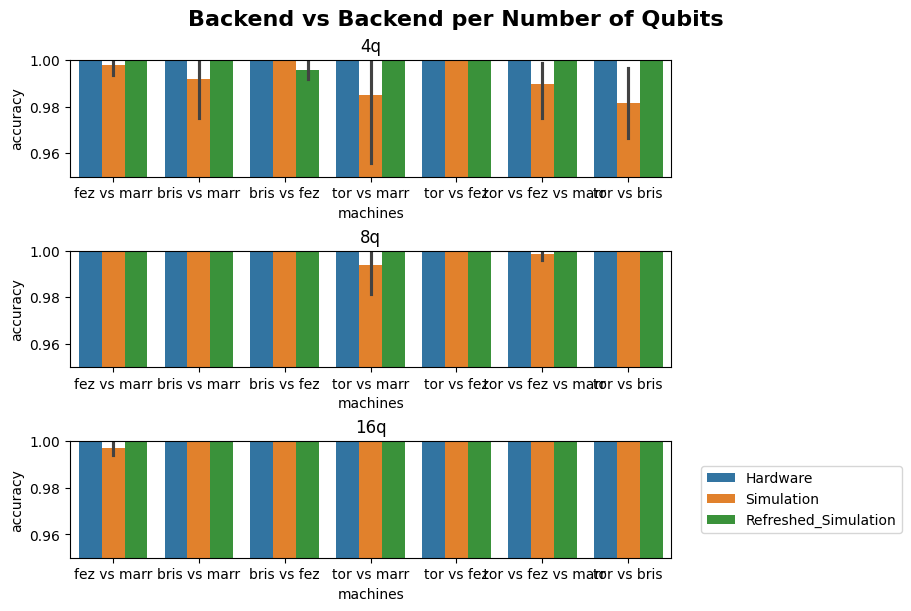

In [10]:
nr_cats = df_16q_BVB['machines'].nunique()
labels = ["fez vs marr", "bris vs marr", "bris vs fez", "tor vs marr", "tor vs fez", " tor vs fez vs marr", "tor vs bris"]

mvf.plot_bar_per_qubit_nr(
    df_4q_BVB, df_8q_BVB, df_16q_BVB,
    labels_= labels,
    nr_cat= nr_cats,
    title_ = 'Backend vs Backend per Number of Qubits',
    lowerY=0.95
)

## 2. Simulated Data cannot replace hardware data
   
   Link to the detailed File: [Cross Experiment Type](Further_detail/Cross_Experiment_Type_Plotting.ipynb)

## 3. Circuit Effect


Link to the detailed File: [Cross Circuit Type](Further_detail/Cross_Circuit_Type_Plotting.ipynb)

## 4. Backend vs Backend
Link to the detailed File: [Cross Backend Type](Further_detail/Cross_Backend_Type_Plotting.ipynb)
    


## 5. The best param modes for SVM and KNN
Link to the detailed File: [Param Modes](Further_detail/Param_Modes_Plotting.ipynb)


## Next stage -> [Stage 8 ](Stage8_Fingerprint_results.ipynb)